In [71]:
import numpy as np
import matplotlib.pyplot as plt


In [72]:
#Size A Plate
s_A = 1 #m

#interval x,y in plate
dx = dy = 0.2          #size blok A                  
nx = int(s_A/dx)
ny = int(s_A/dy)
x  = np.linspace(0,s_A,nx)
y  = np.linspace(0,s_A,ny)
n = s_A/dx

#material properties
dens = 2700 #kg/m^3       Density
sp_heat = 500 #J/         kgK Specific heat
th_con = 10 #W/mK         Thermal conductivity

#time grid
t_sim = 100                #s TIME 
dt =  0.5                 #s Time step
nt  = int(t_sim/dt)       #Number of time step

#Intial Condition
T_a = 10             #temperature of the red plate
T_b = 100            #temperature of the blue plate

#define result parameter
t0 = T_a * np.ones((nx, ny))
u = np.empty((nx, ny))

In [73]:
#SIMULATION

#Intitial condition of the blue plate
ds = 0.2              #size blok B 
cs, ys = 0.4, 0.4     #distance from the border

ds2 = ds**2
for i in range(nx):  #calculate heat in blue plate
    for j in range(ny):
        p2 = (i*dx-cs)**2 + (j*dy-ys)**2
        if p2 < ds2:
            t0[i,j]= T_b
    
def do_timestep(t0, u):
    # Propagate with forward-difference in time, central-difference in space
    u[1:-1, 1:-1] = t0[1:-1, 1:-1] + dt * th_con/(dens*sp_heat) * (
          (t0[2:, 1:-1] - 2*t0[1:-1, 1:-1] + t0[:-2, 1:-1])/dx**2
          + (t0[1:-1, 2:] - 2*t0[1:-1, 1:-1] + t0[1:-1, :-2])/dy**2 )

    t0 = u.copy()
    return t0, u
    


0 1
10 2
50 3
100 4


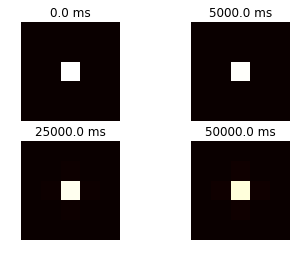

In [74]:
# Output 4 figures at these timesteps

mfig = [0, 10, 50, 100]
fignum = 0
fig = plt.figure()
for m in range(nt):
    t0, u = do_timestep(t0, u)
    if m in mfig:
        fignum += 1
        print(m, fignum)
        ax = fig.add_subplot(220 + fignum)
        im = ax.imshow(u.copy(), cmap=plt.get_cmap('hot'), vmin=T_a,vmax=T_b)
        ax.set_axis_off()
        ax.set_title('{:.1f} ms'.format(m*dt*1000))
fig.subplots_adjust(right=0.85)
plt.show()